In [3]:
print("Salam")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Salam


In [4]:
df = pd.read_csv(r"E:\Data Sets\sugar_factory_data.csv")

In [5]:
# Frequency distribution table
bins = [80, 90, 100, 110, 120, 130]
labels = ['80-89', '90-99', '100-109', '110-119', '120-129']
df['Prod_Range'] = pd.cut(df['Production (tons)'], bins=bins, labels=labels)
freq_table = df['Prod_Range'].value_counts().sort_index().reset_index()
freq_table.columns = ['Production Range', 'Frequency']
freq_table['Cumulative'] = freq_table['Frequency'].cumsum()
freq_table['Relative'] = freq_table['Frequency'] / freq_table['Frequency'].sum()
freq_table['Percentage'] = freq_table['Relative'] * 100
print(freq_table)

  Production Range  Frequency  Cumulative  Relative  Percentage
0            80-89          2           2  0.105263   10.526316
1            90-99          6           8  0.315789   31.578947
2          100-109          7          15  0.368421   36.842105
3          110-119          3          18  0.157895   15.789474
4          120-129          1          19  0.052632    5.263158


In [6]:
# Create stem-and-leaf from Production
prod = df['Production (tons)'].astype(str).tolist()

# Generate stem-leaf pairs
stem_leaf = {}
for val in df['Production (tons)']:
    stem = val // 10
    leaf = val % 10
    if stem in stem_leaf:
        stem_leaf[stem].append(leaf)
    else:
        stem_leaf[stem] = [leaf]

# Print it nicely
for stem, leaves in sorted(stem_leaf.items()):
    print(f"{stem} | {' '.join(map(str, sorted(leaves)))}")

8 | 0 5
9 | 0 2 5 6 7 8
10 | 0 2 3 5 7 8 8
11 | 0 5 8
12 | 0 1


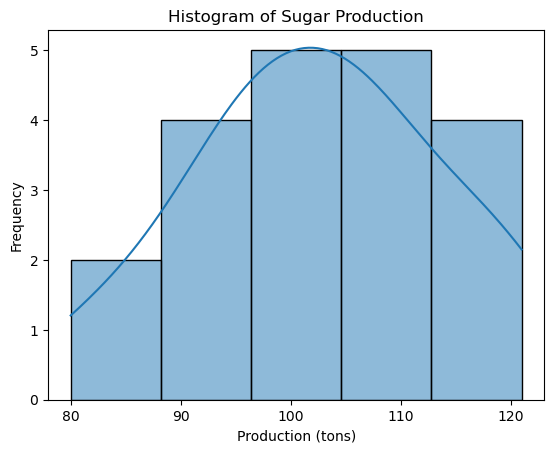

In [7]:
sns.histplot(df['Production (tons)'], bins=5, kde=True)
plt.title("Histogram of Sugar Production")
plt.xlabel("Production (tons)")
plt.ylabel("Frequency")
plt.show()

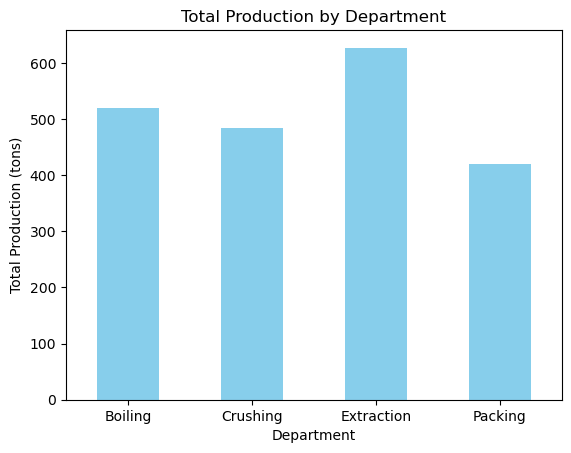

In [8]:
# Group and sum production by department
prod_by_dept = df.groupby('Department')['Production (tons)'].sum()
# Plot bar chart
prod_by_dept.plot(kind='bar', color='skyblue')
plt.title("Total Production by Department")
plt.xlabel("Department")
plt.ylabel("Total Production (tons)")
plt.xticks(rotation=0)
plt.show()

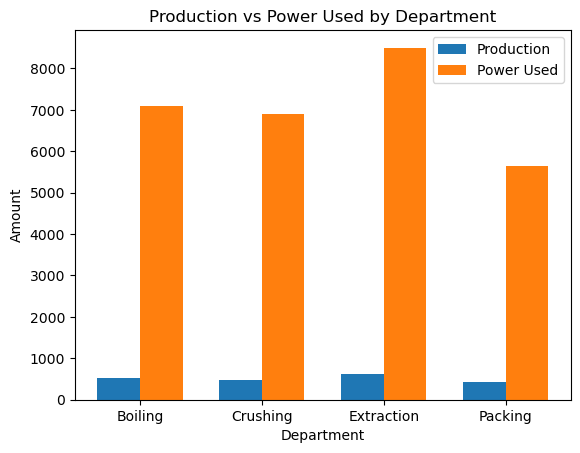

In [9]:
# Grouping by department
grouped = df.groupby('Department')[['Production (tons)', 'Power Used (kWh)']].sum()
# Creating bar positions
x = np.arange(len(grouped))
width = 0.35
# Plotting multiple bars
fig, ax = plt.subplots()
bar1 = ax.bar(x - width/2, grouped['Production (tons)'], width, label='Production')
bar2 = ax.bar(x + width/2, grouped['Power Used (kWh)'], width, label='Power Used')
ax.set_xlabel('Department')
ax.set_ylabel('Amount')
ax.set_title('Production vs Power Used by Department')
ax.set_xticks(x)
ax.set_xticklabels(grouped.index)
ax.legend()
plt.show()

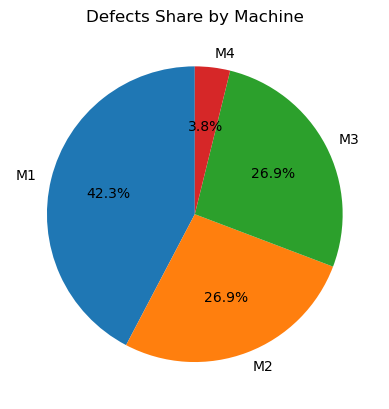

In [10]:
# Group by machine
defects_by_machine = df.groupby('Machine Used')['Defects'].sum()
# Plot pie chart
defects_by_machine.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Defects Share by Machine')
plt.ylabel('')  # Hide y-label
plt.show()

In [11]:
# Averages
mean_prod = df['Production (tons)'].mean()
median_prod = df['Production (tons)'].median()
mode_prod = df['Production (tons)'].mode().values[0]

print("Mean:", mean_prod)
print("Median:", median_prod)
print("Mode:", mode_prod)

# Dispersion
range_prod = df['Production (tons)'].max() - df['Production (tons)'].min()
variance = df['Production (tons)'].var()
std_dev = df['Production (tons)'].std()
cv = (std_dev / mean_prod) * 100

print("Range:", range_prod)
print("Variance:", variance)
print("Standard Deviation:", std_dev)
print("Coefficient of Variation:", cv, "%")


Mean: 102.5
Median: 102.5
Mode: 108
Range: 41
Variance: 127.52631578947368
Standard Deviation: 11.292755013258443
Coefficient of Variation: 11.017321964154577 %


In [12]:
from scipy.stats import skew, kurtosis

# Skewness
skewness = skew(df['Production (tons)'])

# Kurtosis
kurt = kurtosis(df['Production (tons)'])

print("Skewness:", skewness)
print("Kurtosis:", kurt)


Skewness: -0.09752708165338254
Kurtosis: -0.6444537142247846


In [13]:
# Range
range_prod = df['Production (tons)'].max() - df['Production (tons)'].min()

# Variance
variance = df['Production (tons)'].var()

# Standard Deviation
std_dev = df['Production (tons)'].std()

# Coefficient of Variation (CV)
cv = (std_dev / mean_prod) * 100

print("Range:", range_prod)
print("Variance:", variance)
print("Standard Deviation:", std_dev)
print("Coefficient of Variation:", cv, "%")


Range: 41
Variance: 127.52631578947368
Standard Deviation: 11.292755013258443
Coefficient of Variation: 11.017321964154577 %


In [14]:
# Define Events
df['A'] = df['Production (tons)'] > 100
df['B'] = df['Defects'] == 0
df['C'] = df['Department'] == 'Extraction'


In [17]:
# P(A or B) = P(A) + P(B) - P(A and B)
p_a = df['A'].mean()
p_b = df['B'].mean()
p_a_and_b = (df['A'] & df['B']).mean()

p_a_or_b = p_a + p_b - p_a_and_b
print("P(A or B):", p_a_or_b)
#Multiplicative Rule
# P(A and B)
p_a_and_b = (df['A'] & df['B']).mean()
print("P(A and B):", p_a_and_b)
#Condition Probability
# P(A|B) = P(A and B) / P(B)
p_a_given_b = p_a_and_b / p_b if p_b != 0 else 0
print("P(A given B):", p_a_given_b)
# Bayes' Theorem
p_b_given_a = (p_a_given_b * p_b) / p_a if p_a != 0 else 0
print("P(B given A):", p_b_given_a)

P(A or B): 0.6500000000000001
P(A and B): 0.2
P(A given B): 0.6666666666666667
P(B given A): 0.36363636363636365
